In [7]:
from mlwpy import *
%matplotlib inline

In [5]:
iris = datasets.load_iris()

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

iris_df['target'] = iris.target
display(pd.concat([iris_df.head(3), iris_df.tail(3)]))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1000,3.5000,1.4000,0.2000,0
1,4.9000,3.0000,1.4000,0.2000,0
2,4.7000,3.2000,1.3000,0.2000,0
147,6.5000,3.0000,5.2000,2.0000,2
148,6.2000,3.4000,5.4000,2.3000,2
149,5.9000,3.0000,5.1000,1.8000,2


/home/ronny/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


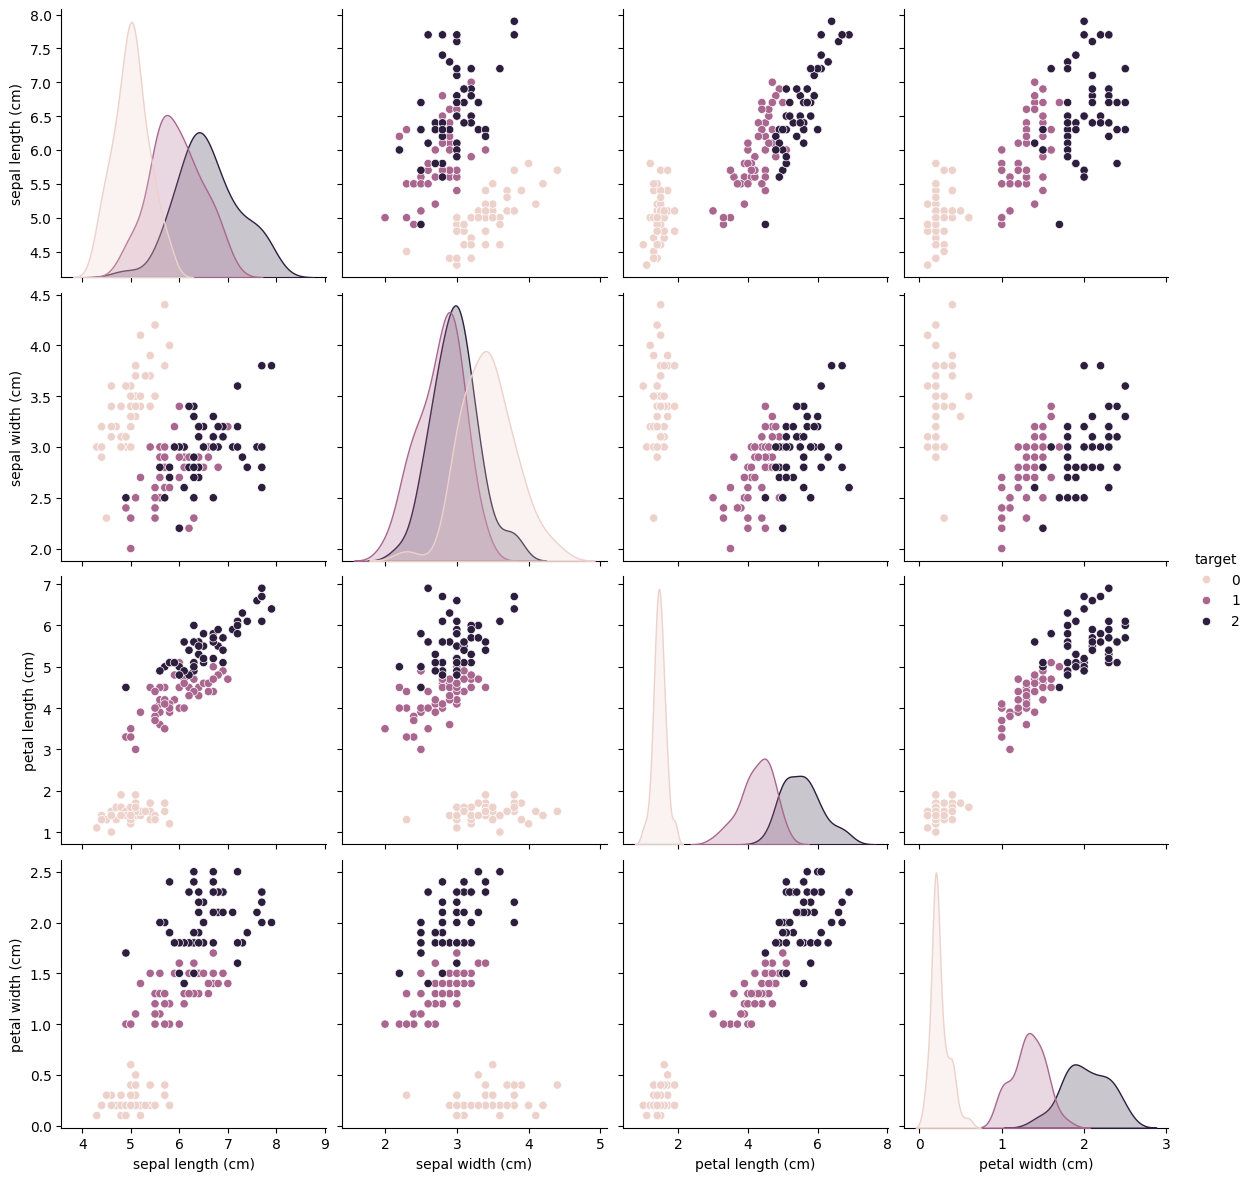

In [13]:
sns.pairplot(iris_df, hue='target', size=3)


In [10]:
print('targets: {}'.format(iris.target_names),
iris.target_names[0], sep="\n")

targets: ['setosa' 'versicolor' 'virginica']
setosa


In [14]:
# simple train-test split
(iris_train_ftrs, iris_test_ftrs,
iris_train_tgt,
iris_test_tgt) = skms.train_test_split(iris.data,
iris.target,
test_size=.25)
print("Train features shape:", iris_train_ftrs.shape)
print("Test features shape:",
iris_test_ftrs.shape)

Train features shape: (112, 4)
Test features shape: (38, 4)


In [29]:
answer_key = np.array([True, True, False, True, ])
student_answers = np.array([False, False, False, False, False, True])

In [30]:
correct = answer_key == student_answers
num_correct = correct.sum() # True == 1, add them up
print("manual accuracy:", num_correct / len(answer_key))

manual accuracy: 0.3333333333333333


In [31]:
print("sklearn accuracy:",
metrics.accuracy_score(answer_key,
student_answers))

sklearn accuracy: 0.3333333333333333


In [33]:
# default n_neighbors = 5
knn= neighbors.KNeighborsClassifier(n_neighbors=3)
fit= knn.fit(iris_train_ftrs, iris_train_tgt)
preds = fit.predict(iris_test_ftrs)
# evaluate our predictions against the held-back testing targets
print("3NN accuracy:",
metrics.accuracy_score(iris_test_tgt, preds))


3NN accuracy: 1.0


In [34]:
# default n_neighbors = 5
knn= neighbors.KNeighborsClassifier(n_neighbors=1)
fit= knn.fit(iris_train_ftrs, iris_train_tgt)
preds = fit.predict(iris_test_ftrs)
# evaluate our predictions against the held-back testing targets
print("1NN accuracy:",
metrics.accuracy_score(iris_test_tgt, preds))



1NN accuracy: 1.0


In [45]:
# default n_neighbors = 5
k = [1,3,7,10, 50, 100, 112]

for i in k:
  knn= neighbors.KNeighborsClassifier(n_neighbors=i)
  fit= knn.fit(iris_train_ftrs, iris_train_tgt)
  preds = fit.predict(iris_test_ftrs)
  # evaluate our predictions against the held-back testing targets
  print(f"{i}NN accuracy:",
  metrics.accuracy_score(iris_test_tgt, preds))



1NN accuracy: 1.0
3NN accuracy: 1.0
7NN accuracy: 1.0
10NN accuracy: 1.0
50NN accuracy: 0.9736842105263158
100NN accuracy: 0.2894736842105263
112NN accuracy: 0.2894736842105263


In [46]:
nb= naive_bayes.GaussianNB()
fit= nb.fit(iris_train_ftrs, iris_train_tgt)
preds = fit.predict(iris_test_ftrs)
print("NB accuracy:",
metrics.accuracy_score(iris_test_tgt, preds))

NB accuracy: 1.0
